In [1]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ImplicitDiffusionTerm, TransientTerm, ImplicitSourceTerm, AdvectionTerm, ConvectionTerm, PowerLawConvectionTerm, ExponentialConvectionTerm
from fipy.tools import numerix
from fipy.solvers.scipy import LinearGMRESSolver, linearPCGSolver
import matplotlib.pyplot as plt

\begin{equation}
    \dfrac{d\phi}{dt} = D\nabla^2\phi
\end{equation}

In [5]:
# my_solver = LinearGMRESSolver(tolerance=1e-16, iterations=5000)
# my_solver = LinearGMRESSolver(tolerance=1e-12, iterations=1000)

# my_solver()

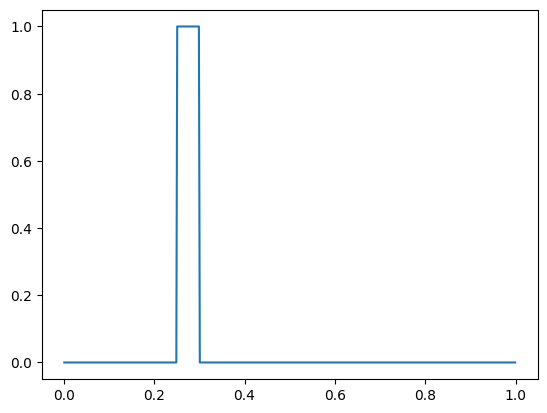

In [18]:
## Build a mesh
Lx = 1.0
nx = 500
mesh = Grid1D(Lx=Lx, nx=nx)

# Define variables
phi = CellVariable(mesh, "phi", value=0.5)

# Define parameters 
D = 0.1
velocity = (10.0, )

# Give boundary conditions
valueLeft, valueRight = 0.0 , 0.0
phi.constrain(valueLeft, mesh.facesLeft)
phi.constrain(valueRight, mesh.facesRight)

# Set initial conditions
x = mesh.cellCenters[0]
phi.setValue(0)
phi.setValue(1.0, where=x > Lx/4)
phi.setValue(0, where=x > Lx/4 + 0.05)

# Show initial condition
fig, ax = plt.subplots()
ax.plot(x, phi)
plt.show()


0
10
20
30
40
50
60
70
80
90


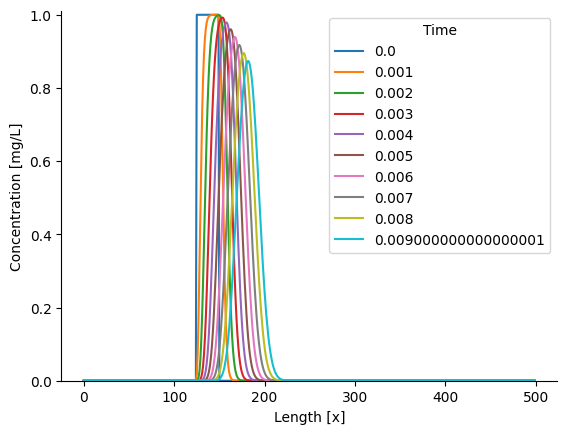

In [19]:
# Build equation
eqX = (
    TransientTerm(var=phi) 
    == 
    ImplicitDiffusionTerm(var=phi, coeff=0.001)
    # ImplicitDiffusionTerm(var=phi, coeff=D)
    # + ImplicitSourceTerm(coeff=0.01)
    - ExponentialConvectionTerm(coeff=velocity, var=phi)
)

# Time control
# timeStepDuration_Dif = abs(0.9 * mesh.dx**2 / (2 * D))  # Difusion control
timeStepDuration_Adv = abs(0.5 * mesh.dx / velocity[0])
dt = timeStepDuration_Adv

steps = 100

# Plot
fig,ax = plt.subplots()

for step in range(steps):
    
    if step%10 == 0:
        ax.plot(phi, label=f"{step*dt}")
        print(step)
    
    eqX.solve(
        var=phi,
        dt=dt,
        # solver=my_solver
    )

    
    # viewer.plot()
ax.set_ylim(0, 1.01)
ax.legend(title="Time")
ax.set_xlabel("Length [x]")
ax.set_ylabel("Concentration [mg/L]")
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

In [5]:
velocity[0] * dt / mesh.dx

0.1